In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix



In [2]:
#veri toplama
data_path = "C:/Users/Lenovo/Desktop/tcmb_aylik_veriler.csv"
data_frame = pd.read_csv(data_path)

In [3]:
data_frame.shape

(55, 19)

In [4]:
data_frame.head(60)

,Tarih,tuketici_kredisi_faizi,1_aylik_mevduat_faizi,3_aylik_mevduat_faizi,usd_mevduat_faizi,eur_mevduat_faizi,tuketici_fiyat_endeksi,ito_gecinme_endeksi,reel_kesim_guven_endeksi,istihdam_orani,issizlik_orani,konut_fiyat_endeksi,toplam_sifir_konut_satisi,toplam_ikinciel_konut_satisi,resmi_rezerv_varliklari,toplam_binek_otomobil_uretimi,usd_try,eur_try,gbp_try
0,2020-1,14.6060,9.3120,10.200000,1.368000,0.168000,446.45,22278.1,104.1,43.5,14.1,120.9,36040.0,77575.0,102467.0,75396.0,5.918159,6.575059,7.722950
1,2020-2,13.8350,8.9775,9.877500,1.167500,0.142500,448.02,22530.4,106.9,43.6,13.5,123.7,37303.0,81450.0,107724.0,87589.0,6.044470,6.593900,7.831265
2,2020-3,14.0400,8.9725,10.085000,0.955000,0.130000,450.58,22604.2,99.7,41.9,13.0,125.4,34089.0,74581.0,92145.0,72093.0,6.314432,6.988741,7.818009
3,2020-4,12.0650,8.7625,10.057500,1.095000,0.172500,454.43,22838.6,66.8,40.3,12.8,127.5,14848.0,27935.0,86343.0,9661.0,6.818952,7.416767,8.449205
4,2020-5,10.6820,7.3260,8.306000,0.754000,0.182000,460.62,23332.7,76.9,41.0,12.6,135.9,16860.0,34076.0,90914.0,43264.0,6.951947,7.559518,8.543576
5,2020-6,11.3975,6.9975,8.120000,0.762500,0.217500,465.84,23348.3,92.6,43.0,13.0,139.5,58632.0,131380.0,86345.0,74264.0,6.808832,7.662423,8.515795
6,2020-7,11.0060,6.9460,8.158000,0.768000,0.230000,468.56,23450.1,100.7,43.0,14.6,141.4,67937.0,161420.0,90254.0,77706.0,6.851095,7.820976,8.622443
7,2020-8,14.3925,8.2850,10.282500,0.977500,0.357500,472.61,23589.1,106.2,43.8,13.0,144.4,52123.0,118285.0,83750.0,45211.0,7.252190,8.575790,9.499045
8,2020-9,17.2725,9.5525,11.780000,1.237500,0.455000,477.21,23934.8,105.3,44.0,12.4,146.7,41376.0,95368.0,79680.0,90447.0,7.507782,8.860750,9.738486
9,2020-10,18.4540,10.4200,12.288000,1.332000,0.548000,487.38,24521.4,108.1,43.6,12.8,149.9,36976.0,82598.0,84526.0,95915.0,7.873881,9.273705,10.198981


In [5]:
data_frame.shape #verinin boyutu

(55, 19)

In [6]:
data_frame.isnull()

,Tarih,tuketici_kredisi_faizi,1_aylik_mevduat_faizi,3_aylik_mevduat_faizi,usd_mevduat_faizi,eur_mevduat_faizi,tuketici_fiyat_endeksi,ito_gecinme_endeksi,reel_kesim_guven_endeksi,istihdam_orani,issizlik_orani,konut_fiyat_endeksi,toplam_sifir_konut_satisi,toplam_ikinciel_konut_satisi,resmi_rezerv_varliklari,toplam_binek_otomobil_uretimi,usd_try,eur_try,gbp_try
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data_frame.isnull().sum()

Tarih                            0
tuketici_kredisi_faizi           0
1_aylik_mevduat_faizi            0
3_aylik_mevduat_faizi            0
usd_mevduat_faizi                0
eur_mevduat_faizi                0
tuketici_fiyat_endeksi           1
ito_gecinme_endeksi              1
reel_kesim_guven_endeksi         0
istihdam_orani                   2
issizlik_orani                   2
konut_fiyat_endeksi              2
toplam_sifir_konut_satisi        1
toplam_ikinciel_konut_satisi     1
resmi_rezerv_varliklari          1
toplam_binek_otomobil_uretimi    1
usd_try                          0
eur_try                          0
gbp_try                          0
dtype: int64

In [8]:
print(type(data_frame))

<class 'pandas.core.frame.DataFrame'>


In [9]:
print(data_frame.dtypes)

Tarih                             object
tuketici_kredisi_faizi           float64
1_aylik_mevduat_faizi            float64
3_aylik_mevduat_faizi            float64
usd_mevduat_faizi                float64
eur_mevduat_faizi                float64
tuketici_fiyat_endeksi           float64
ito_gecinme_endeksi              float64
reel_kesim_guven_endeksi         float64
istihdam_orani                   float64
issizlik_orani                   float64
konut_fiyat_endeksi              float64
toplam_sifir_konut_satisi        float64
toplam_ikinciel_konut_satisi     float64
resmi_rezerv_varliklari          float64
toplam_binek_otomobil_uretimi    float64
usd_try                          float64
eur_try                          float64
gbp_try                          float64
dtype: object


In [10]:
print(data_frame['Tarih'].count())  # Number of duplicate dates


55


In [11]:

# Tarih sütununu indeks olarak ayarlayı
data_frame['Tarih']=pd.to_datetime(data_frame['Tarih'])

data_frame.sort_values(by='Tarih', inplace=True)
data_frame.set_index('Tarih', inplace=True)

print(data_frame.head())
print("Total number of unique index values:", data_frame.index.nunique())

# Optionally, display the total number of rows in the DataFrame
print("Total number of rows in the DataFrame:", len(data_frame))

            tuketici_kredisi_faizi  1_aylik_mevduat_faizi  \
Tarih                                                       
2020-01-01                  14.606                 9.3120   
2020-02-01                  13.835                 8.9775   
2020-03-01                  14.040                 8.9725   
2020-04-01                  12.065                 8.7625   
2020-05-01                  10.682                 7.3260   

            3_aylik_mevduat_faizi  usd_mevduat_faizi  eur_mevduat_faizi  \
Tarih                                                                     
2020-01-01                10.2000             1.3680             0.1680   
2020-02-01                 9.8775             1.1675             0.1425   
2020-03-01                10.0850             0.9550             0.1300   
2020-04-01                10.0575             1.0950             0.1725   
2020-05-01                 8.3060             0.7540             0.1820   

            tuketici_fiyat_endeksi  ito_gecinm

In [12]:
data_frame = data_frame.fillna(data_frame.mean())

In [13]:
print(data_frame.dtypes)

tuketici_kredisi_faizi           float64
1_aylik_mevduat_faizi            float64
3_aylik_mevduat_faizi            float64
usd_mevduat_faizi                float64
eur_mevduat_faizi                float64
tuketici_fiyat_endeksi           float64
ito_gecinme_endeksi              float64
reel_kesim_guven_endeksi         float64
istihdam_orani                   float64
issizlik_orani                   float64
konut_fiyat_endeksi              float64
toplam_sifir_konut_satisi        float64
toplam_ikinciel_konut_satisi     float64
resmi_rezerv_varliklari          float64
toplam_binek_otomobil_uretimi    float64
usd_try                          float64
eur_try                          float64
gbp_try                          float64
dtype: object


In [14]:
data_frame.isnull().sum()

tuketici_kredisi_faizi           0
1_aylik_mevduat_faizi            0
3_aylik_mevduat_faizi            0
usd_mevduat_faizi                0
eur_mevduat_faizi                0
tuketici_fiyat_endeksi           0
ito_gecinme_endeksi              0
reel_kesim_guven_endeksi         0
istihdam_orani                   0
issizlik_orani                   0
konut_fiyat_endeksi              0
toplam_sifir_konut_satisi        0
toplam_ikinciel_konut_satisi     0
resmi_rezerv_varliklari          0
toplam_binek_otomobil_uretimi    0
usd_try                          0
eur_try                          0
gbp_try                          0
dtype: int64

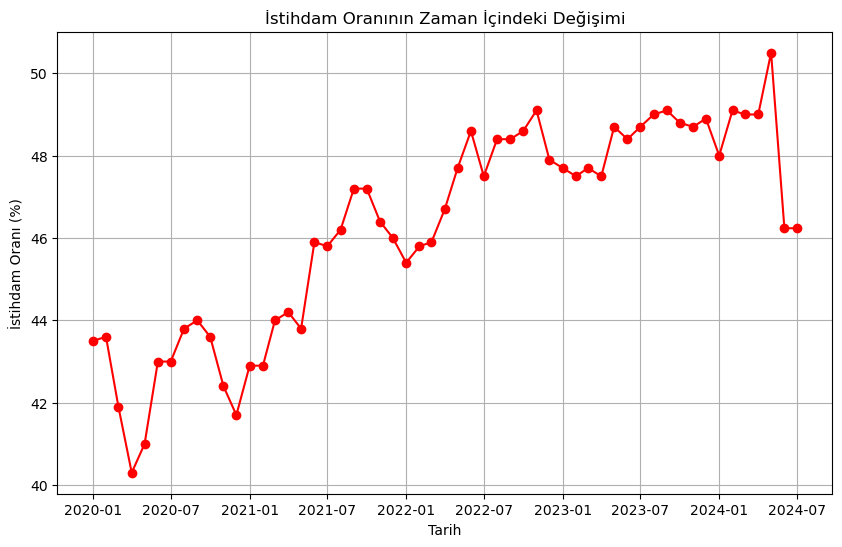

In [15]:
#VERİ GÖRSELLEŞTİRME
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirleme
plt.plot(data_frame.index, data_frame['istihdam_orani'], marker='o', linestyle='-', color='r')

# Başlık ve etiketler ekleme
plt.title('İstihdam Oranının Zaman İçindeki Değişimi')
plt.xlabel('Tarih')
plt.ylabel('İstihdam Oranı (%)')
plt.grid(True)
plt.show()


In [16]:
# Korelasyon matrisini hesaplama
correlation_matrix = data_frame.corr()

# Korelasyon matrisini görüntüleme
print(correlation_matrix)


                               tuketici_kredisi_faizi  1_aylik_mevduat_faizi  \
tuketici_kredisi_faizi                       1.000000               0.972145   
1_aylik_mevduat_faizi                        0.972145               1.000000   
3_aylik_mevduat_faizi                        0.978745               0.982236   
usd_mevduat_faizi                            0.594573               0.456091   
eur_mevduat_faizi                            0.797754               0.707172   
tuketici_fiyat_endeksi                       0.913786               0.857789   
ito_gecinme_endeksi                          0.914302               0.862657   
reel_kesim_guven_endeksi                     0.033023               0.052265   
istihdam_orani                               0.670560               0.567430   
issizlik_orani                              -0.728680              -0.631473   
konut_fiyat_endeksi                          0.831417               0.742120   
toplam_sifir_konut_satisi               

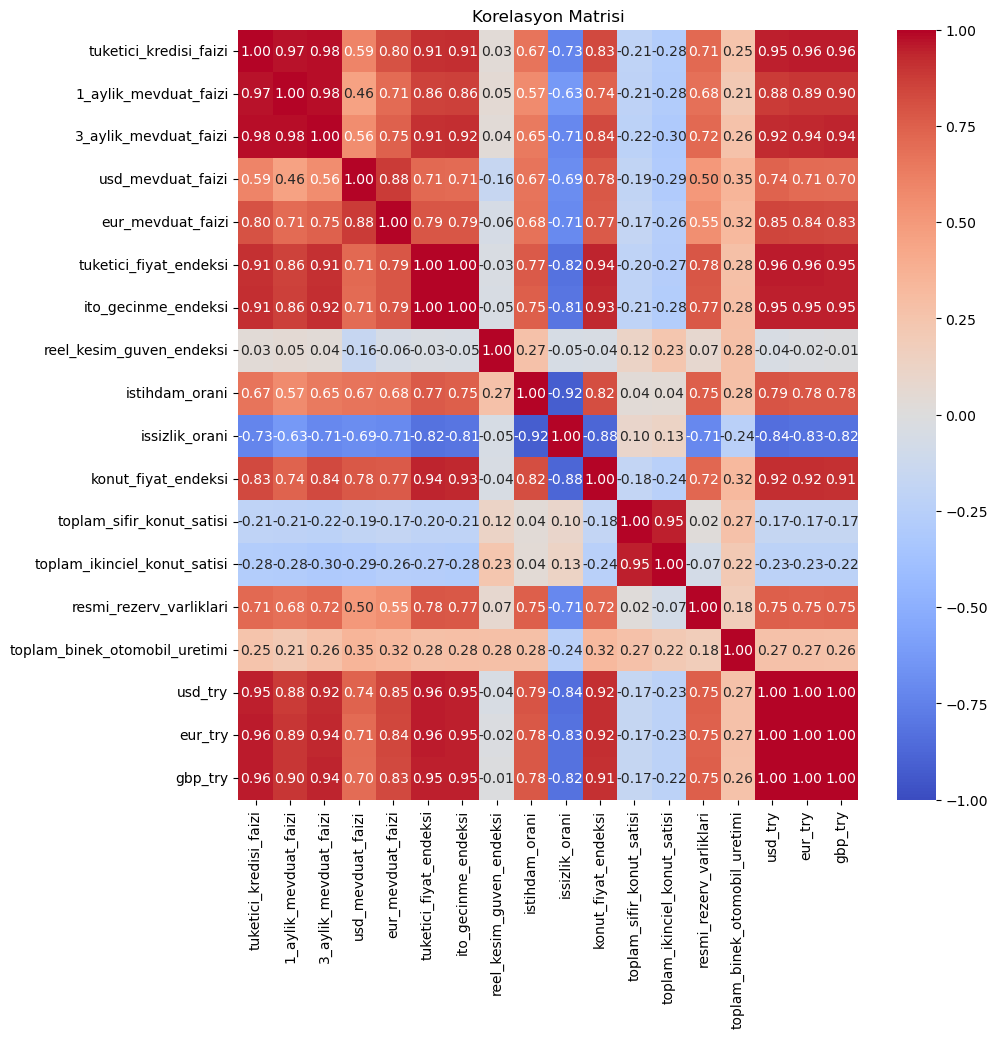

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisinin ısı haritasını oluşturma
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Başlık ekleme
plt.title('Korelasyon Matrisi')
plt.show()


In [18]:
data_frame.columns

Index(['tuketici_kredisi_faizi', '1_aylik_mevduat_faizi',
       '3_aylik_mevduat_faizi', 'usd_mevduat_faizi', 'eur_mevduat_faizi',
       'tuketici_fiyat_endeksi', 'ito_gecinme_endeksi',
       'reel_kesim_guven_endeksi', 'istihdam_orani', 'issizlik_orani',
       'konut_fiyat_endeksi', 'toplam_sifir_konut_satisi',
       'toplam_ikinciel_konut_satisi', 'resmi_rezerv_varliklari',
       'toplam_binek_otomobil_uretimi', 'usd_try', 'eur_try', 'gbp_try'],
      dtype='object')

In [19]:

selected_features=['tuketici_kredisi_faizi','1_aylik_mevduat_faizi',
       '3_aylik_mevduat_faizi', 'usd_mevduat_faizi', 'eur_mevduat_faizi',
       'tuketici_fiyat_endeksi', 'ito_gecinme_endeksi','konut_fiyat_endeksi','resmi_rezerv_varliklari','usd_try', 'eur_try', 'gbp_try','istihdam_orani']

data_frame=data_frame[selected_features]

In [20]:
data_frame.head

<bound method NDFrame.head of             tuketici_kredisi_faizi  1_aylik_mevduat_faizi  \
Tarih                                                       
2020-01-01                 14.6060                 9.3120   
2020-02-01                 13.8350                 8.9775   
2020-03-01                 14.0400                 8.9725   
2020-04-01                 12.0650                 8.7625   
2020-05-01                 10.6820                 7.3260   
2020-06-01                 11.3975                 6.9975   
2020-07-01                 11.0060                 6.9460   
2020-08-01                 14.3925                 8.2850   
2020-09-01                 17.2725                 9.5525   
2020-10-01                 18.4540                10.4200   
2020-11-01                 19.8650                12.6400   
2020-12-01                 21.9150                14.6400   
2021-01-01                 22.1160                15.6640   
2021-02-01                 21.7250                15.54

In [21]:
data_frame.corr()

,tuketici_kredisi_faizi,1_aylik_mevduat_faizi,3_aylik_mevduat_faizi,usd_mevduat_faizi,eur_mevduat_faizi,tuketici_fiyat_endeksi,ito_gecinme_endeksi,konut_fiyat_endeksi,resmi_rezerv_varliklari,usd_try,eur_try,gbp_try,istihdam_orani
tuketici_kredisi_faizi,1.000000,0.972145,0.978745,0.594573,0.797754,0.913786,0.914302,0.831417,0.714582,0.947890,0.956120,0.958407,0.670560
1_aylik_mevduat_faizi,0.972145,1.000000,0.982236,0.456091,0.707172,0.857789,0.862657,0.742120,0.684331,0.877886,0.893922,0.898011,0.567430
3_aylik_mevduat_faizi,0.978745,0.982236,1.000000,0.558555,0.745692,0.911928,0.916123,0.835390,0.717819,0.924746,0.937267,0.937722,0.645999
usd_mevduat_faizi,0.594573,0.456091,0.558555,1.000000,0.879628,0.711113,0.709482,0.779803,0.503763,0.736335,0.710637,0.697795,0.671070
eur_mevduat_faizi,0.797754,0.707172,0.745692,0.879628,1.000000,0.788997,0.785383,0.767681,0.548527,0.850187,0.836538,0.831314,0.675738
tuketici_fiyat_endeksi,0.913786,0.857789,0.911928,0.711113,0.788997,1.000000,0.999082,0.938383,0.781642,0.956361,0.955561,0.952261,0.768929
ito_gecinme_endeksi,0.914302,0.862657,0.916123,0.709482,0.785383,0.999082,1.000000,0.934042,0.774937,0.951649,0.951483,0.947746,0.751647
konut_fiyat_endeksi,0.831417,0.742120,0.835390,0.779803,0.767681,0.938383,0.934042,1.000000,0.719371,0.920154,0.916709,0.908959,0.819206
resmi_rezerv_varliklari,0.714582,0.684331,0.717819,0.503763,0.548527,0.781642,0.774937,0.719371,1.000000,0.750883,0.748992,0.750776,0.752780
usd_try,0.947890,0.877886,0.924746,0.736335,0.850187,0.956361,0.951649,0.920154,0.750883,1.000000,0.997941,0.997243,0.789437


In [22]:
X = data_frame[['tuketici_kredisi_faizi','1_aylik_mevduat_faizi','3_aylik_mevduat_faizi','usd_mevduat_faizi','eur_mevduat_faizi','tuketici_fiyat_endeksi','ito_gecinme_endeksi','konut_fiyat_endeksi','resmi_rezerv_varliklari','usd_try','eur_try','gbp_try']]
y = data_frame['istihdam_orani']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
test_dates = X_test.index


In [23]:
# Model kurma
model = LinearRegression()
# Modeli eğitim verisi ile eğitme
model.fit(X_train, y_train)



LinearRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred


array([48.34043667, 45.98119529, 47.37697851, 49.15698406, 46.64007295,
       45.17974154, 43.70493962, 44.64013437, 47.11836741, 42.96654576,
       43.13226763, 48.77280711, 43.39452651, 47.28876572, 48.05783347,
       46.3305593 , 42.73123938])

In [25]:

y_pred = pd.DataFrame(y_pred, index=X_test.index, columns=['Predicted Values'])

# y_test'i DataFrame'e çevirme
y_test = pd.DataFrame(y_test)


In [26]:
# Tahmin yapma
y_pred = model.predict(X_test) #Modelin tahminlerinin gerçek değerlere ne kadar yakın olduğunu gösterir.
y_test = np.array(y_test)
type(y_pred)



numpy.ndarray

In [27]:
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)


In [28]:
# y_test ve y_pred'i 2D hale getirme
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

print("X_test boyutu:", X_test.shape)
print("y_test boyutu:", y_test.shape)
print("y_pred boyutu:", y_pred.shape)


X_test boyutu: (17, 12)
y_test boyutu: (17, 1)
y_pred boyutu: (17, 1)


In [29]:
#Ortalamanın ne kadar iyi olduğunu gösterir
mse = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hatası (MSE):", mse)

Ortalama Kare Hatası (MSE): 1.4323486808200245


In [30]:
#R2 al
r2 = r2_score(y_test, y_pred)
print("R2 :",r2)

R2 : 0.812887597180768


In [31]:
mean_absolute_error(y_test,y_pred)

0.9022038880530943

In [32]:
mean_absolute_percentage_error(y_test,y_pred)

0.01950003630731839

In [33]:
mean_squared_error(y_test,y_pred)

1.4323486808200245

In [34]:
print(type(y_test))
print(type(y_pred))
print(y_test.shape)
print(y_pred.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(17, 1)
(17, 1)


In [35]:
# Tahminleri sıralı tarihlerle eşleşecek şekilde sıralayın
sorted_indices = np.argsort(test_dates)
test_dates_sorted = test_dates[sorted_indices]
y_test_sorted = np.array(y_test)[sorted_indices]  # numpy array dönüşümü
y_pred_sorted = np.array(y_pred)[sorted_indices]  # numpy array dönüşümü



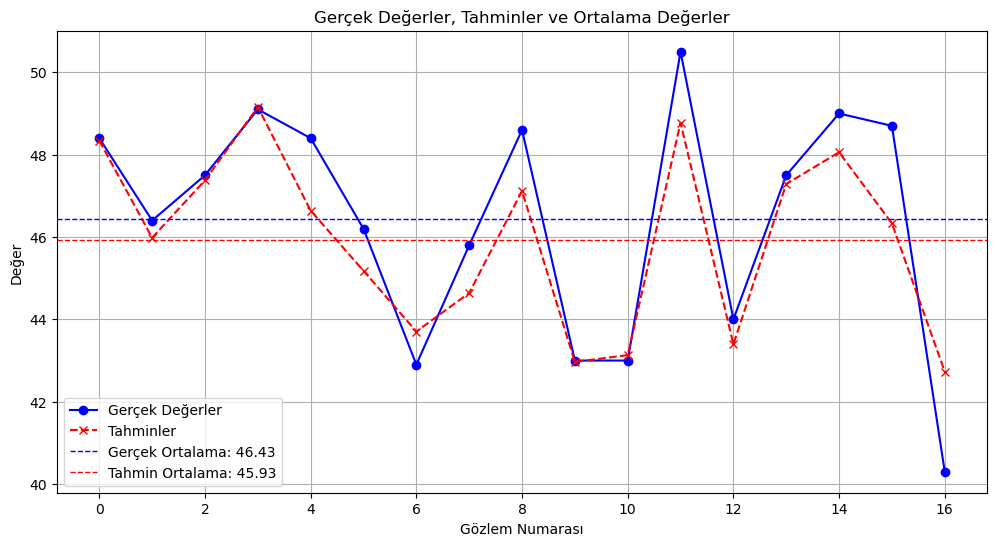

In [36]:
gözlem_numarası = np.arange(len(y_test))

# Ortalama değerler
mean_y_test = np.mean(y_test)
mean_y_pred = np.mean(y_pred)

plt.figure(figsize=(12, 6))

# Gerçek değerler
plt.plot(gözlem_numarası, y_test, marker='o', linestyle='-', color='b', label='Gerçek Değerler')

# Tahminler
plt.plot(gözlem_numarası, y_pred, marker='x', linestyle='--', color='r', label='Tahminler')

# Ortalama değerler için sabit çizgi
plt.axhline(mean_y_test, color='b', linestyle='--', linewidth=1, label=f'Gerçek Ortalama: {mean_y_test:.2f}')
plt.axhline(mean_y_pred, color='r', linestyle='--', linewidth=1, label=f'Tahmin Ortalama: {mean_y_pred:.2f}')

plt.xlabel('Gözlem Numarası')
plt.ylabel('Değer')
plt.title('Gerçek Değerler, Tahminler ve Ortalama Değerler')
plt.legend()
plt.grid(True)
plt.show()

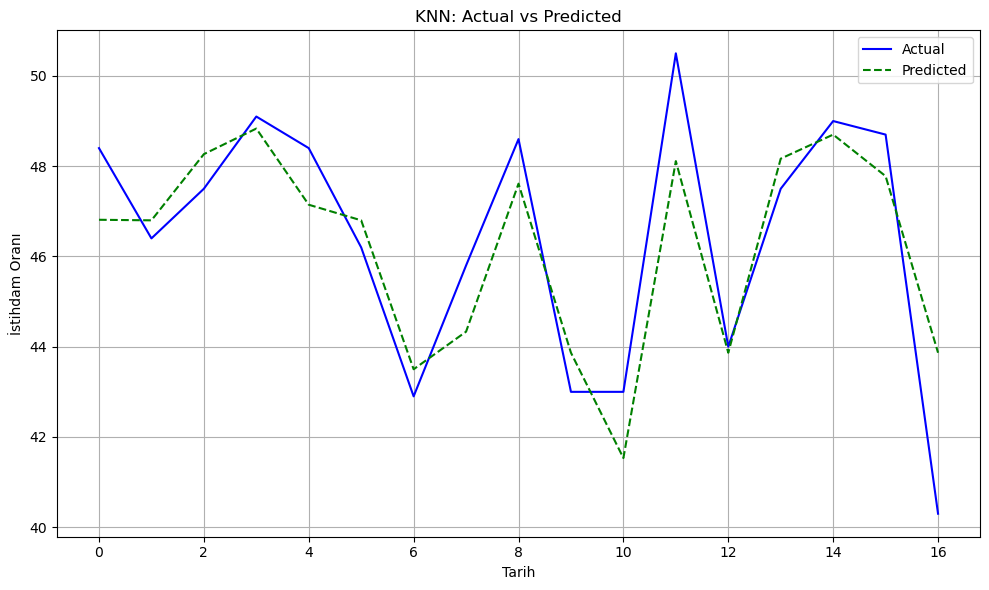

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# KNN
plt.figure(figsize=(10, 6))
plt.plot(gözlem_numarası, y_test, label='Actual', color='blue')
plt.plot(gözlem_numarası, y_pred_knn, label='Predicted', linestyle='--', color='green')
plt.xlabel('Tarih')
plt.ylabel('İstihdam Oranı')
plt.title('KNN: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Tahminlerde bulunma
y_pred_knn_reg = knn_regressor.predict(X_test)

In [39]:
mae_knn_reg = mean_absolute_error(y_test, y_pred_knn_reg)
mse_knn_reg = mean_squared_error(y_test, y_pred_knn_reg)
rmse_knn_reg = mse_knn_reg**0.5
r2_knn_reg = r2_score(y_test, y_pred_knn_reg)

print(f'KNN MAE: {mae_knn_reg}')
print(f'KNN MSE: {mse_knn_reg}')
print(f'KNN RMSE: {rmse_knn_reg}')
print(f'KNN R²: {r2_knn_reg}')

KNN MAE: 1.0727709951905302
KNN MSE: 1.8518100084462452
KNN RMSE: 1.36081226054377
KNN R²: 0.7580919891330449


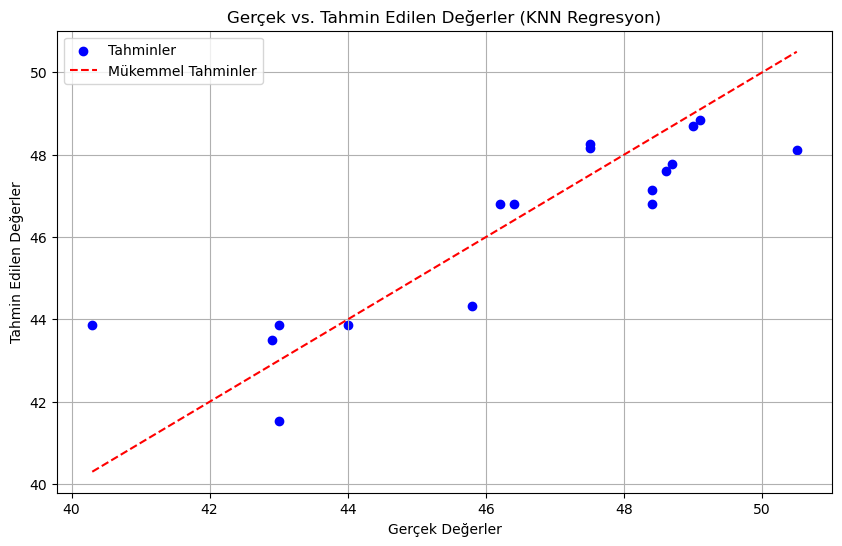

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn_reg, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Mükemmel Tahminler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler (KNN Regresyon)')
plt.legend()
plt.grid(True)
plt.show()


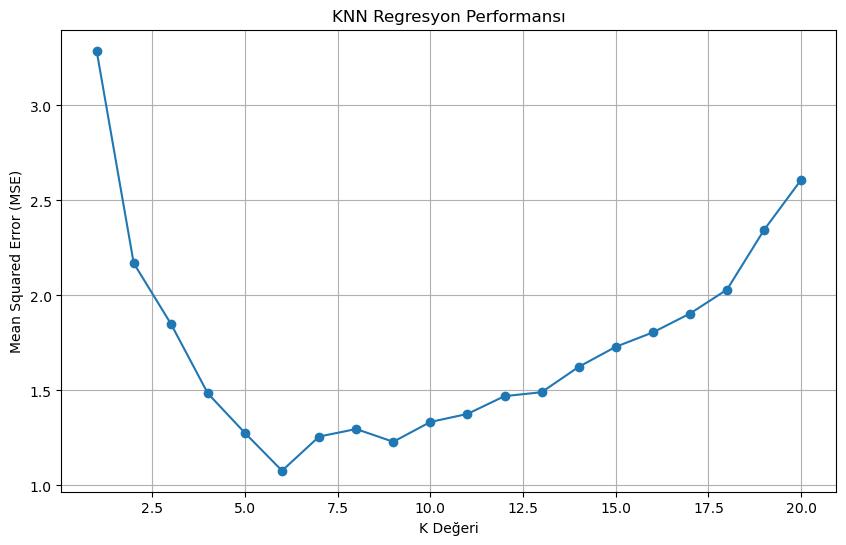

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

k_range = range(1, 21)
mse_scores = []

for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, mse_scores, marker='o')
plt.xlabel('K Değeri')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Regresyon Performansı')
plt.grid(True)
plt.show()


En uygun k değeri: 6
En yüksek R² değeri: 0.8592388241962448


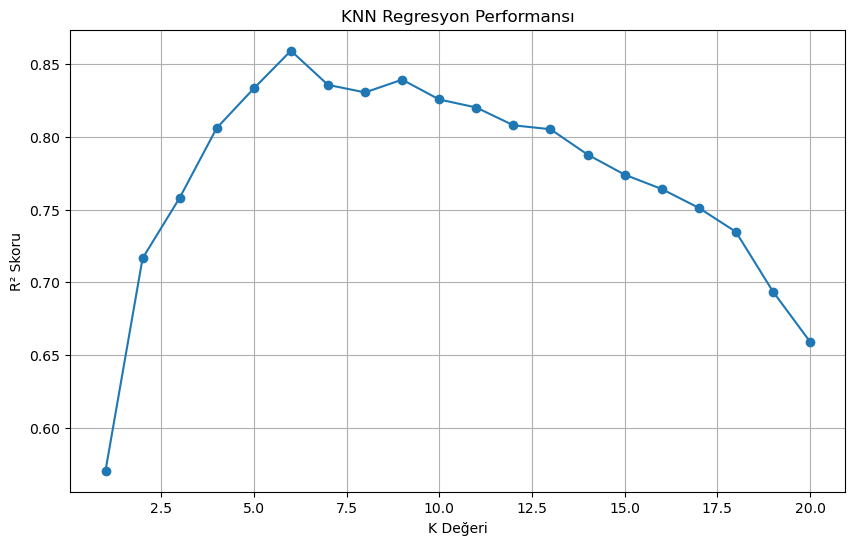

In [42]:
# Farklı `k` değerleri için `R²` skorlarını hesaplama
k_range = range(1, 21)  # Örneğin, 1'den 20'ye kadar k değerlerini test etme
r2_scores = []

for k in k_range:
    # Modeli oluşturma ve eğitme
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Tahminlerde bulunma
    y_pred = model.predict(X_test)
    
    # R² skoru hesaplama
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# En yüksek R² değerini ve karşılık gelen `k` değerini bulma
best_k = k_range[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print(f'En uygun k değeri: {best_k}')
print(f'En yüksek R² değeri: {best_r2}')

# R² skorlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_range, r2_scores, marker='o')
plt.xlabel('K Değeri')
plt.ylabel('R² Skoru')
plt.title('KNN Regresyon Performansı')
plt.grid(True)